# Introduction

The National Longitudinal Survey of Youth 1997-2011 dataset is one of the most important databases available to social scientists working with US data. 

It allows scientists to look at the determinants of earnings as well as educational attainment and has incredible relevance for government policy. It can also shed light on politically sensitive issues like how different educational attainment and salaries are for people of different ethnicity, sex, and other factors. When we have a better understanding how these variables affect education and earnings we can also formulate more suitable government policies. 

<center><img src=https://i.imgur.com/cxBpQ3I.png height=400></center>


### Upgrade Plotly

In [1]:
%pip install --upgrade plotly
%pip install --upgrade pip
%pip install --upgrade plotly
%pip install --upgrade seaborn
%pip install --upgrade matplotlib
%pip install --upgrade scikit-learn
%pip install --install nbformat


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Usage:   
  /usr/local/bin/python3 -m pip install [options] <requirement specifier> [package-index-options] ...
  /usr/local/bin/python3 -m pip install [options] -r <requirements file> [package-index-options] ...
  /usr/local/bin/python3 -m pip install [options] [-e] <vcs project url> ...
  /usr/local/bin/python3 -m pip install [options] [-e] <local project path> ...
  /usr/local/bin/python3 -m pip install [options] <archive url/path> ...

no such option: --install
Note: you may need to restart the kernel to use updated packages.


###  Import Statements


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data



In [3]:
df_data = pd.read_csv('NLSY97_subset.csv')

### Understand the Dataset

Have a look at the file entitled `NLSY97_Variable_Names_and_Descriptions.csv`. 

---------------------------

    :Key Variables:  
      1. S           Years of schooling (highest grade completed as of 2011)
      2. EXP         Total out-of-school work experience (years) as of the 2011 interview.
      3. EARNINGS    Current hourly earnings in $ reported at the 2011 interview

# Preliminary Data Exploration 🔎

**Challenge**

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [4]:
df_data.shape

(2000, 96)

In [5]:
df_data.columns

Index(['ID', 'EARNINGS', 'S', 'EXP', 'FEMALE', 'MALE', 'BYEAR', 'AGE',
       'AGEMBTH', 'HHINC97', 'POVRAT97', 'HHBMBF', 'HHBMOF', 'HHOMBF',
       'HHBMONLY', 'HHBFONLY', 'HHOTHER', 'MSA97NO', 'MSA97NCC', 'MSA97CC',
       'MSA97NK', 'ETHBLACK', 'ETHHISP', 'ETHWHITE', 'EDUCPROF', 'EDUCPHD',
       'EDUCMAST', 'EDUCBA', 'EDUCAA', 'EDUCHSD', 'EDUCGED', 'EDUCDO',
       'PRMONM', 'PRMONF', 'PRMSTYUN', 'PRMSTYPE', 'PRMSTYAN', 'PRMSTYAE',
       'PRFSTYUN', 'PRFSTYPE', 'PRFSTYAN', 'PRFSTYAE', 'SINGLE', 'MARRIED',
       'COHABIT', 'OTHSING', 'FAITHN', 'FAITHP', 'FAITHC', 'FAITHJ', 'FAITHO',
       'FAITHM', 'ASVABAR', 'ASVABWK', 'ASVABPC', 'ASVABMK', 'ASVABNO',
       'ASVABCS', 'ASVABC', 'ASVABC4', 'VERBAL', 'ASVABMV', 'HEIGHT',
       'WEIGHT04', 'WEIGHT11', 'SF', 'SM', 'SFR', 'SMR', 'SIBLINGS', 'REG97NE',
       'REG97NC', 'REG97S', 'REG97W', 'RS97RURL', 'RS97URBN', 'RS97UNKN',
       'JOBS', 'HOURS', 'TENURE', 'CATGOV', 'CATPRI', 'CATNPO', 'CATMIS',
       'CATSE', 'COLLBARG', 'URBAN'

In [6]:
df_data.isna().values.any()

True

In [7]:
df_data.duplicated().values.any()

True

In [9]:
df_data.count()

ID          2000
EARNINGS    2000
S           2000
EXP         2000
FEMALE      2000
            ... 
MSA11NO     2000
MSA11NCC    2000
MSA11CC     2000
MSA11NK     2000
MSA11NIC    2000
Length: 96, dtype: int64

## Data Cleaning - Check for Missing Values and Duplicates

Find and remove any duplicate rows.

In [10]:
df_data.drop_duplicates(inplace=True)

In [11]:
df_data.shape

(1487, 96)

## Descriptive Statistics

In [12]:
df_data.describe()

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
count,"1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,453.00","1,205.00",...,"1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00"
mean,"3,547.13",18.81,14.56,6.70,0.49,0.51,"1,982.07",28.93,26.32,"58,310.67",...,0.78,0.16,0.27,0.34,0.23,0.05,0.54,0.41,0.00,0.00
std,"2,009.84",12.00,2.77,2.86,0.50,0.50,1.38,1.38,5.08,"43,868.05",...,0.43,0.36,0.44,0.47,0.42,0.21,0.50,0.49,0.04,0.00
min,1.00,2.00,6.00,0.00,0.00,0.00,"1,980.00",27.00,12.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,888.00",11.41,12.00,4.65,0.00,0.00,"1,981.00",28.00,23.00,"32,000.00",...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"3,474.00",15.75,15.00,6.63,0.00,1.00,"1,982.00",29.00,26.00,"50,500.00",...,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
75%,"5,160.50",22.60,16.00,8.71,1.00,1.00,"1,983.00",30.00,30.00,"72,000.00",...,1.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00
max,"8,980.00",132.89,20.00,14.73,1.00,1.00,"1,984.00",31.00,45.00,"246,474.00",...,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00


## Visualise the Features

In [13]:
df_data.head()

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
0,4275,18.50,12,9.71,0,1,1984,27,24.00,"64,000.00",...,1,0,0,1,0,0,0,1,0,0
1,4328,19.23,17,5.71,0,1,1982,29,32.00,"6,000.00",...,2,0,0,1,0,0,1,0,0,0
2,8763,39.05,14,9.94,0,1,1981,30,23.00,"88,252.00",...,1,0,0,0,1,0,0,1,0,0
3,8879,16.80,18,1.54,0,1,1983,28,30.00,NaN,...,1,0,1,0,0,0,1,0,0,0
4,1994,36.06,15,2.94,0,1,1984,27,23.00,"44,188.00",...,1,0,0,0,1,0,0,1,0,0


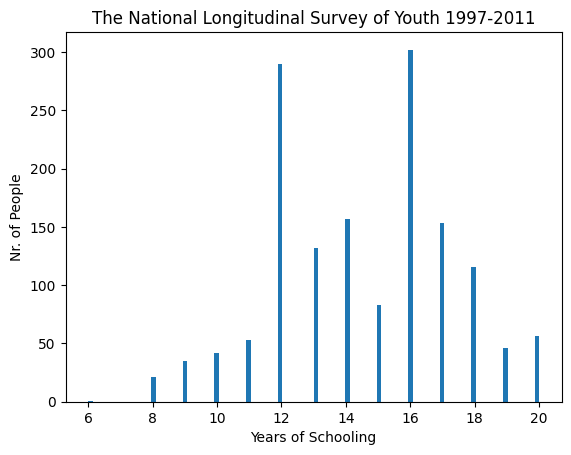

In [14]:
# Using Matplotlin to visualise the Earnings 
plt.hist(x=df_data['S'],bins=100)
plt.xlabel('Years of Schooling')
plt.ylabel('Nr. of People')
plt.title('The National Longitudinal Survey of Youth 1997-2011')
plt.show()

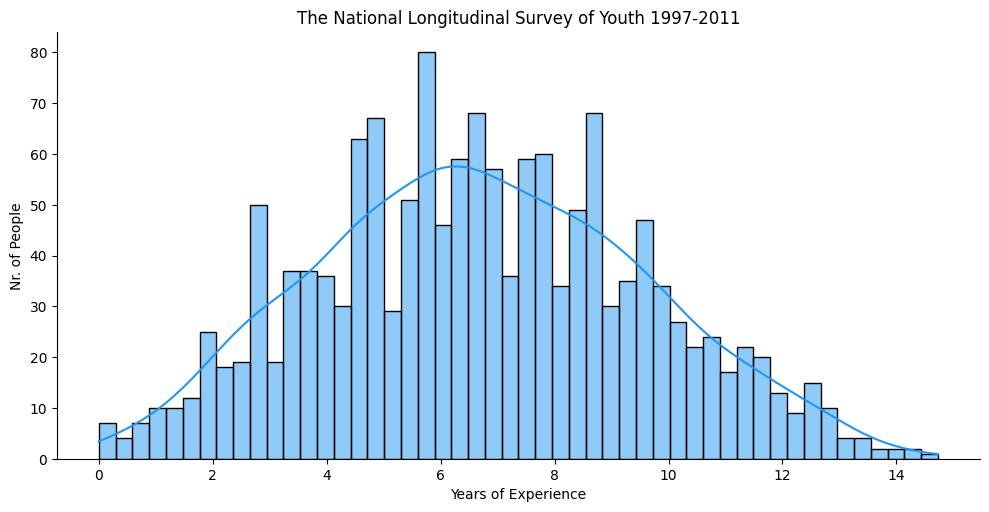

In [15]:
# Using Seaborn to visualise the Years of Schooling
sns.displot(df_data['EXP'], 
            bins=50, 
            aspect=2,
            kde=True, 
            color='#2196f3')

plt.title(f'The National Longitudinal Survey of Youth 1997-2011')
plt.xlabel('Years of Experience')
plt.ylabel('Nr. of People')

plt.show()

In [16]:
# Using Plotly to visualise the Years of Earnings

fig = px.histogram(df_data['EARNINGS'], nbins=100)
fig.update_layout(
    xaxis_title='EARNINGS',
    yaxis_title='Nr. of People',
    title='The National Longitudinal Survey of Youth 1997-2011',
)
fig.update_traces(marker_line_width=1, 
                  marker_line_color='black',
                  marker_color='green')


fig.show()

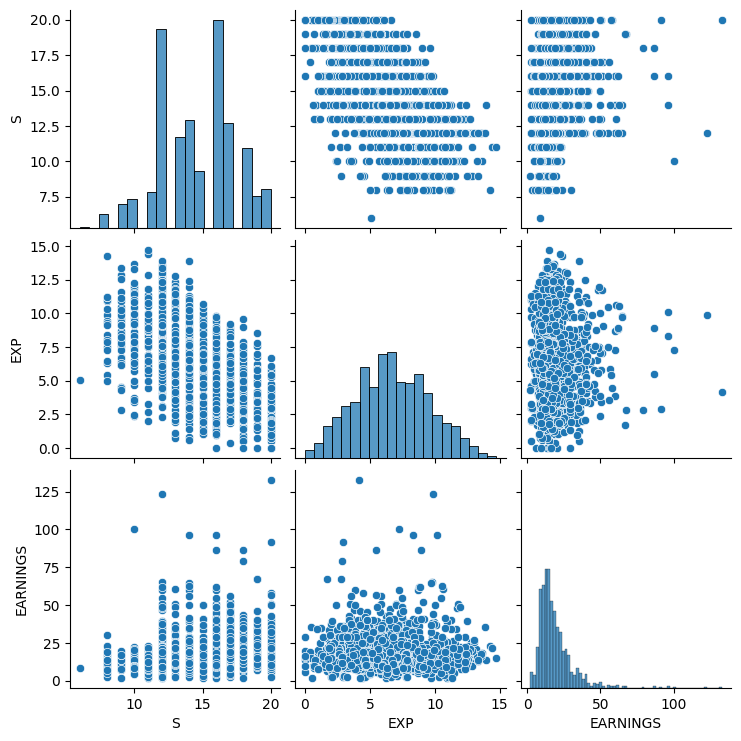

In [17]:
# visualise how the 3 main variables relate to each other
sns.pairplot(df_data[["S","EXP","EARNINGS"]])
plt.show()

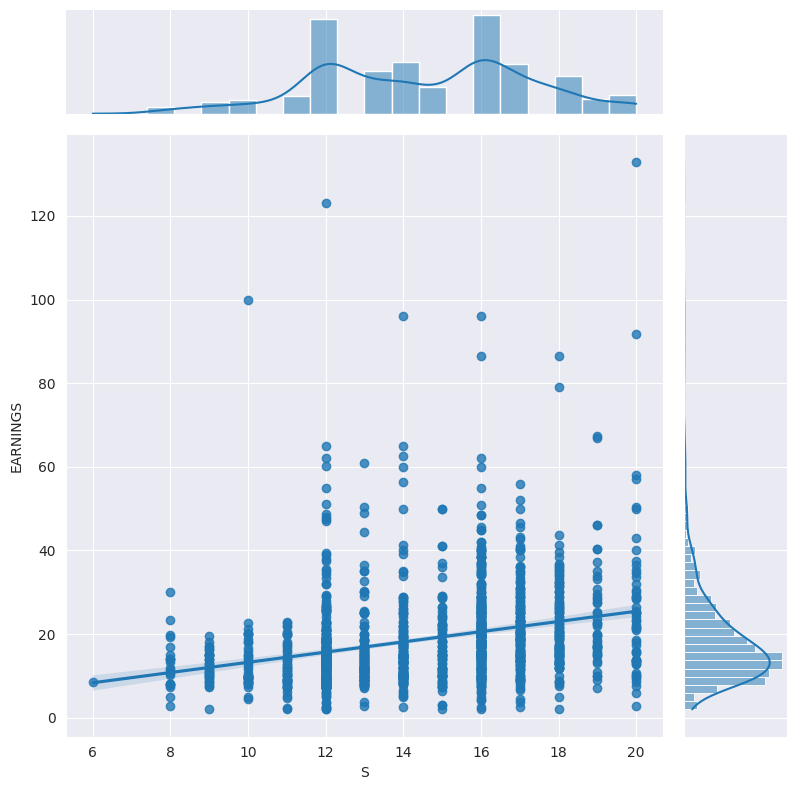

In [33]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=df_data['S'], 
                y=df_data['EARNINGS'], 
                height=8, 
                kind='reg'
                )
plt.show()

# on the average, EARNINGS go up when you stay longer in SCHOOL

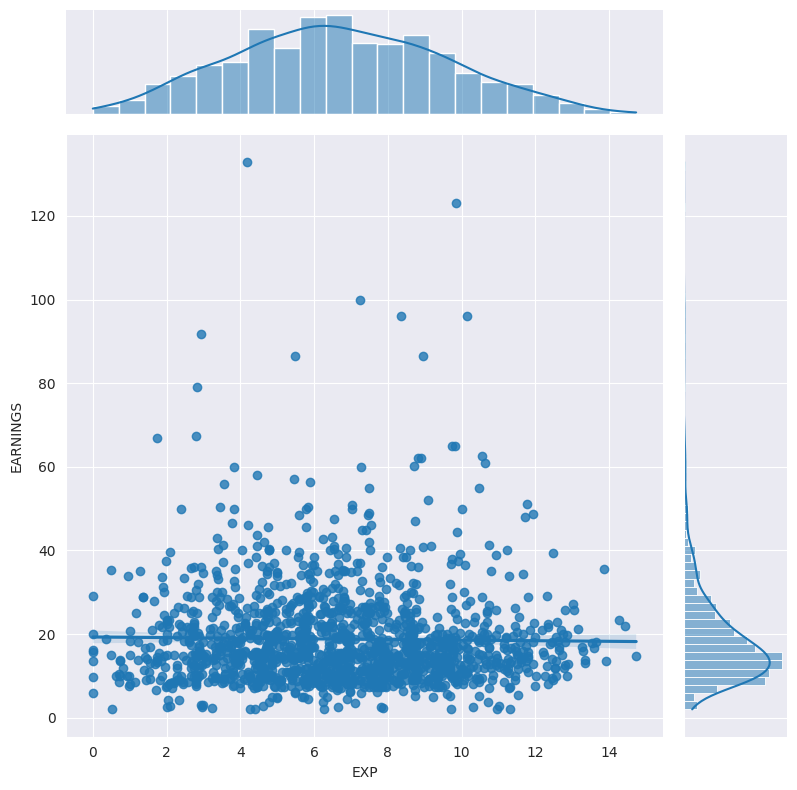

In [18]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=df_data['EXP'], 
                y=df_data['EARNINGS'], 
                height=8, 
                kind='reg'
                )
plt.show()

# on the average, EARNINGS does not increase with EXPERIENCE

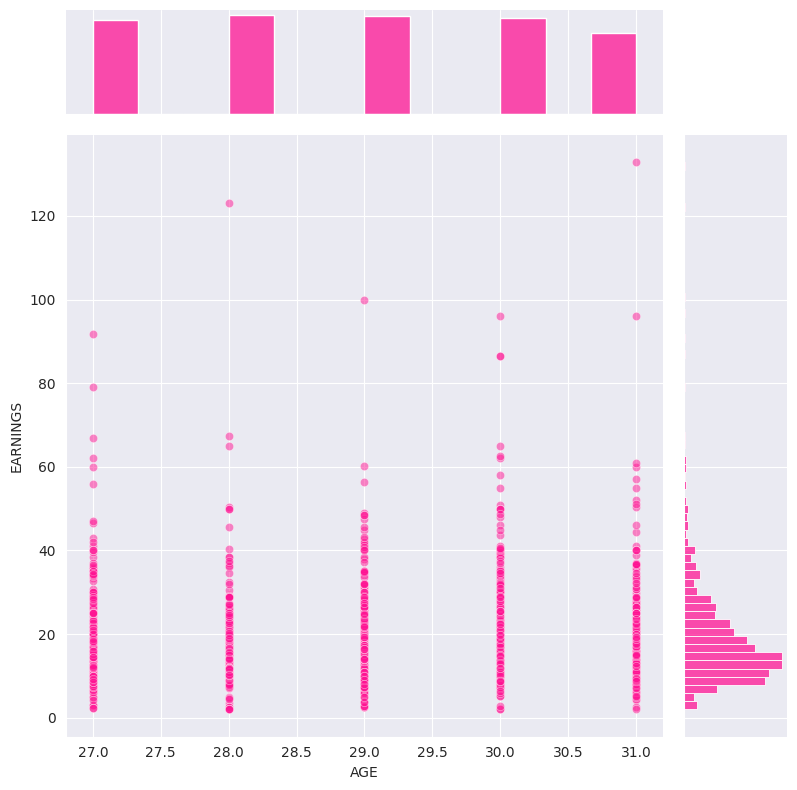

In [19]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=df_data['AGE'], 
                y=df_data['EARNINGS'], 
                height=8, 
                kind='scatter',
                color='deeppink', 
                joint_kws={'alpha':0.5})

plt.show()


# Age VS Earnings

# Split Training & Test Dataset

We *can't* use all the entries in our dataset to train our model. Keep 20% of the data for later as a testing dataset (out-of-sample data).  

In [20]:
features = df_data[["S"]]
target = df_data["EARNINGS"]

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)

In [21]:
print(x_train)
#print(x_test)
#print(y_train)
#print(y_test)

       S
179   14
142   16
1626  10
707   12
1288  18
...   ..
1762  17
1660   9
527   14
1263  16
1541  16

[1189 rows x 1 columns]


# Simple Linear Regression

Only use the years of schooling to predict earnings. Use sklearn to run the regression on the training dataset. How high is the r-squared for the regression on the training data? 

In [22]:
regression = LinearRegression()
regression.fit(x_train, y_train)

rsquared = regression.score(x_train, y_train)
print(f'Training data r-squared: {rsquared}')

rsquared = regression.score(x_test, y_test)
print(f'Test data r-squared: {rsquared}')

Training data r-squared: 0.08085050566060015
Test data r-squared: 0.07259152432544957


### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative). 

Interpret the regression. How many extra dollars can one expect to earn for an additional year of schooling?

In [23]:


# Get the coefficient for the "S" variable. Since there is only one variable in the features, the array will have only one element
coefficient_s = regression.coef_[0]
print(f"Coefficient of S: {coefficient_s}")
# Interpret the coefficient
if coefficient_s > 0:
    print(f"For each additional year of schooling, one can expect to earn approximately ${coefficient_s:.2f} more, on average, holding all other variables constant.")
else:
    print(f"For each additional year of schooling, one can expect to earn approximately ${abs(coefficient_s):.2f} less, on average, holding all other variables constant.")


Coefficient of S: 1.219177982001225
For each additional year of schooling, one can expect to earn approximately $1.22 more, on average, holding all other variables constant.


### Analyse the Estimated Values & Regression Residuals

How good our regression is also depends on the residuals - the difference between the model's predictions ( 𝑦̂ 𝑖 ) and the true values ( 𝑦𝑖 ) inside y_train. Do you see any patterns in the distribution of the residuals?

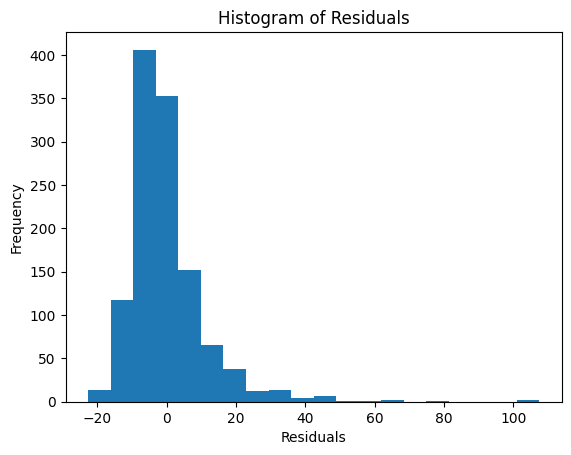

In [24]:


# Get the predicted values for the training set
y_pred_train = regression.predict(x_train)

# Calculate the residuals
residuals = y_train - y_pred_train

# Plot a histogram of the residuals
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()


# Multivariable Regression

Now use both years of schooling and the years work experience to predict earnings. How high is the r-squared for the regression on the training data? 

In [25]:
features = df_data[["S", "EXP"]]
target = df_data["EARNINGS"]

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)

regression = LinearRegression()
regression.fit(x_train, y_train)

rsquared = regression.score(x_train, y_train)
print(f'Training data r-squared: {rsquared}')

rsquared = regression.score(x_test, y_test)
print(f'Test data r-squared: {rsquared}')

Training data r-squared: 0.11705510273476538
Test data r-squared: 0.08728661136725502


### Evaluate the Coefficients of the Model

In [26]:
coefficient = regression.coef_
print(f"Coefficient of S: {coefficient[0]}")

print(f"Coefficient of EXP: {coefficient[1]}")

Coefficient of S: 1.7942217526678976
Coefficient of EXP: 0.9790068858450054


### Analyse the Estimated Values & Regression Residuals

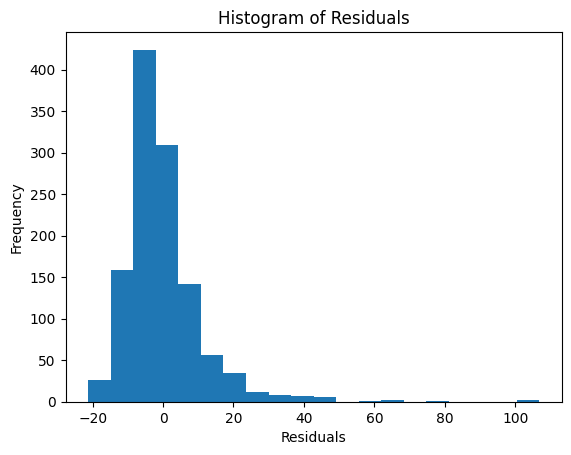

In [27]:
# Get the predicted values for the training set
y_pred_train = regression.predict(x_train)

# Calculate the residuals
residuals = y_train - y_pred_train

# Plot a histogram of the residuals
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# Use Your Model to Make a Prediction

How much can someone with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn in 2011?

In [28]:
new_data = {
    "S":[16],
    "EXP":[5]
}
new_df = pd.DataFrame(new_data, columns=["S", "EXP"])
new_df

,S,EXP
0,16,5


In [34]:
new_prediction = regression.predict(new_df)
print(f"Someone with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn: {new_prediction[0]}  (PER HOUR)")

Someone with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn: 19.714790361272613  (PER HOUR)


# Experiment and Investigate Further

Which other features could you consider adding to further improve the regression to better predict earnings? 

In [60]:
# Adding AGE to the features to see the impact.

features = df_data[["S", "EXP", "AGE"]]
target = df_data["EARNINGS"]

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)

regression = LinearRegression()
regression.fit(x_train, y_train)

rsquared = regression.score(x_train, y_train)
print(f'Training data r-squared: {rsquared}')

rsquared = regression.score(x_test, y_test)
print(f'Test data r-squared: {rsquared}')

Training data r-squared: 0.11954713290154317
Test data r-squared: 0.07928745143327898


In [ ]:
# AGE did not make any impact to model accuracy on new data